# Concert halls in Switzerland : a territorial study

## Introduction

Culture is a major factor when measuring a city's attractivity, whether it is for attracting tourists, skilled people, or simply to increase the well being
of the inhabitants and their quality of living.

There are regular discussions about cultural fundings, and here in Switzerland, the language situation (with 4 different official languages, but we will probably not have 'Romanche' speaking cities, given it is a rural population, and represents less than one % to the total population), and the federal regime, with highly independant states (called canton), makes this issue even more closely followed.

One of the component of cultural activity, is the music scene, and one way to measure how lively is the musical scene in a city, is through the concert halls.

The following study, aims to compare the major cities in Swizerland in terms of concert halls per capita, to provide an insight to the federal authorities, music professionals or simply to people interested in the cultural state of things from a numbers perspective, on the current distribution of the venues between the cities, opening the door for more focused studies on the budget side of things, to see how the discrepancies, if any, between the different territories could be explained, solved.

By grouping the cities into distinct clusers, based on the number of venues per capita, but also the number of inhabitants, we should be able to provide the insight needed to explore further the issue.
Through a chloropeth map, we will also be able to see how the territory part, affects the distribution.

## Data sources

### I. Data on Cities 

Data on cities will include:

- Geospatial coordinates
- The state in which the city is located
- The population
- The name of the city

All this data will be scrapped from the website https://simplemaps.com/data/ch-cities as a downloadable csv.



### II. Data on concert halls

Based on foursquare, we will be able to retrieve the venues, located in the different cities.
Here is an example of concert hall as described in foursquare.
https://foursquare.com/v/lusine/4adcdab5f964a5209a5021e3
A concert hall, is considered a 'Category' and this data should be easy to extract using the API.

We will be only focusing on the number of venues, we will need to defines the radius used to include a venue in the city or not.


# Data processing

## I. Get the data on cities


In [1]:
#Import and install all the needed libraries

%pip install geopy
%pip install requests
!pip install folium

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests # library to handle requests
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [11]:


import types
import pandas as pd


# @hidden_cell


df_data_1 = pd.read_csv(r"C:\Users\Jamal\OneDrive\Bureau\ch.csv")
df_data_1.head()


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Zürich,47.3786,8.5400,Switzerland,CH,Zürich,admin,434008.0,434008.0
1,Geneva,46.2000,6.1500,Switzerland,CH,Genève,admin,201818.0,201818.0
2,Basel,47.5606,7.5906,Switzerland,CH,Basel-Stadt,admin,177595.0,177595.0
3,Lausanne,46.5333,6.6333,Switzerland,CH,Vaud,admin,138905.0,138905.0
4,Bern,46.9480,7.4474,Switzerland,CH,Bern,primary,133798.0,133798.0


In [12]:
#let's drop all unwanted columns : iso2 / country / capital /population

cities_data = df_data_1.drop(['iso2', 'country','capital','population'], axis=1)

print(cities_data.shape)

(115, 5)


In [13]:
#This step will save some API calls and some time

cities_data.tail()

cities_data = cities_data[cities_data['population_proper'].notna()]
print(cities_data.shape)

(90, 5)


## II. Get the foursquare data

### Before gathering the foursquare data, let's first have a look of a map of Switzerland major cities

In [14]:
address = 'Switzerland, CH'

geolocator = Nominatim(user_agent="ch_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Switzerland are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Switzerland are 46.7985624, 8.2319736.


In [15]:
import folium

# create map of Toronto using latitude and longitude values
map_ch = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, city in zip(cities_data['lat'], cities_data['lng'],cities_data['city']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ch)  
    
map_ch

In [17]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius


url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId=4d4b7104d754a06370d81259,4bf58dd8d48988d1e5931735&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)


In [18]:
results = requests.get(url).json()
#results

print(results)

{'meta': {'code': 200, 'requestId': '601040bb822ee86095253f5e'}, 'response': {'venues': [{'id': '4ee8f6344fc620859b260420', 'name': 'Mittelpunkt der Schweiz', 'location': {'address': 'Älggi-Alp', 'lat': 46.79849506992126, 'lng': 8.23199987411499, 'labeledLatLngs': [{'label': 'display', 'lat': 46.79849506992126, 'lng': 8.23199987411499}], 'distance': 7, 'postalCode': '6072', 'cc': 'CH', 'city': 'Sachseln', 'state': 'Obwalden', 'country': 'Schweiz', 'formattedAddress': ['Älggi-Alp', '6072 Sachseln', 'Schweiz']}, 'categories': [{'id': '52e81612bcbc57f1066b79ed', 'name': 'Outdoor Sculpture', 'pluralName': 'Outdoor Sculptures', 'shortName': 'Outdoor Sculpture', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/sculpture_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1611677883', 'hasPerk': False}, {'id': '57193479498e4010d7d63ea6', 'name': 'Swiss Local', 'location': {'lat': 46.79833, 'lng': 8.231685, 'labeledLatLngs': [{'label': 'display', 'lat': 46.79833,

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['venues'][0]

print(venues)

nearby_venues = json_normalize(venues) # flatten JSON

print(nearby_venues)

{'id': '4ee8f6344fc620859b260420', 'name': 'Mittelpunkt der Schweiz', 'location': {'address': 'Älggi-Alp', 'lat': 46.79849506992126, 'lng': 8.23199987411499, 'labeledLatLngs': [{'label': 'display', 'lat': 46.79849506992126, 'lng': 8.23199987411499}], 'distance': 7, 'postalCode': '6072', 'cc': 'CH', 'city': 'Sachseln', 'state': 'Obwalden', 'country': 'Schweiz', 'formattedAddress': ['Älggi-Alp', '6072 Sachseln', 'Schweiz']}, 'categories': [{'id': '52e81612bcbc57f1066b79ed', 'name': 'Outdoor Sculpture', 'pluralName': 'Outdoor Sculptures', 'shortName': 'Outdoor Sculpture', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/sculpture_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1611677883', 'hasPerk': False}
                         id                     name  \
0  4ee8f6344fc620859b260420  Mittelpunkt der Schweiz   

                                          categories    referralId  hasPerk  \
0  [{'id': '52e81612bcbc57f1066b79ed', 'name': 'O...  v-161

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [21]:
LIMIT = 50
radius = 8000

In [22]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId=5032792091d4c4b30a586d5c,4bf58dd8d48988d1e5931735&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['name'],
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name'])
            for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city',
                  'lat', 
                  'lng', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
interest_categories ='4d4b7104d754a06370d81259'

ch_venues = getNearbyVenues(names=cities_data['city'],
                                latitudes=cities_data['lat'],
                                longitudes=cities_data['lng'],
                                )

Zürich
Geneva
Basel
Lausanne
Bern
Winterthur
Lucerne
Sankt Gallen
Lugano
Biel/Bienne
Thun
Bellinzona
Köniz
La Chaux-de-Fonds
Fribourg
Schaffhausen
Vernier
Chur
Sion
Uster
Neuchâtel
Landecy
Zug
Yverdon-les-Bains
Emmen
Dübendorf
Kriens
Rapperswil-Jona
Dietikon
Montreux
Frauenfeld
Wetzikon
Baar
Meyrin
Wil
Bulle
Horgen
Carouge
Kreuzlingen
Wädenswil
Riehen
Aarau
Allschwil
Renens
Wettingen
Nyon
Bülach
Vevey
Opfikon
Kloten
Reinach
Baden
Onex
Adliswil
Schlieren
Volketswil
Pully
Regensdorf
Gossau
Martigny
Muttenz
Thalwil
Monthey
Ostermundigen
Grenchen
Olten
Effretikon
Sierre
Solothurn
Pratteln
Burgdorf
Einsiedeln
Schwyz
Liestal
Brig-Glis
Delémont
Glarus
Pfäffikon
Weinfelden
Hinwil
Davos
Sarnen
Sursee
Rorschach
Altdorf
Stans
Appenzell
Interlaken
Bad Zurzach
Laufenburg


In [24]:
print(ch_venues.shape)
ch_venues.head(200)

(3665, 7)


,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zürich,47.3786,8.5400,X-TRA Club,47.384113,8.532827,Nightclub
1,Zürich,47.3786,8.5400,Zwinglikirche,47.493165,8.739897,Music Venue
2,Zürich,47.3786,8.5400,Parkplatz Holberg,47.448112,8.580289,Music Venue
3,Zürich,47.3786,8.5400,Jesuitenplatz,47.050831,8.304949,Music Venue
4,Zürich,47.3786,8.5400,Wilerbar,47.137269,8.585341,Music Venue
...,...,...,...,...,...,...,...
195,Bern,46.9480,7.4474,Probelokal Area45 (Kleinkaliberstand),47.258297,7.561556,Music Venue
196,Bern,46.9480,7.4474,Sommernachtsfest,47.055124,7.624871,Jazz Club
197,Bern,46.9480,7.4474,the moots Bandraum,46.932115,7.487696,Rock Club
198,Bern,46.9480,7.4474,Urban Sound Openair,46.949157,7.405603,Music Venue


In [25]:
ch_test = ch_venues.groupby('Venue Category').count()
ch_test_distinct = ch_venues['Venue Category'].unique()
print(ch_test_distinct)

['Nightclub' 'Music Venue' 'Concert Hall' 'Jazz Club'
 'Indie Movie Theater' 'Bar' 'Theater' 'Piano Bar' 'Rock Club'
 'Comedy Club' 'Dive Bar' 'Music School' 'General Entertainment' 'Pub'
 'Convention Center' 'Hotel' 'Public Art' 'Stadium' 'Lounge' 'School'
 'Other Great Outdoors' 'Restaurant' 'Event Space' 'Cocktail Bar'
 'Hotel Bar' 'Steakhouse' 'College Arts Building' 'Recording Studio'
 'Performing Arts Venue' 'Cultural Center' 'Church' 'Swiss Restaurant'
 'Apres Ski Bar' 'Wine Bar' 'Radio Station' 'Boarding House']


### The category as interpreted by foursquare, is not standardized, meaning that the user who created the venue, affects one or multiple categories, what will happen here is that some data will be missing, cause the main category is not 'Concert Hall' or the subcategories that we choose to retain. <br>
### Also the data might be expired...


In [26]:
ch_concert_test = ch_venues[ch_venues['Venue Category'].isin(['Cultural Center','Rock Club','Concert Hall','Music Venue','Opera House','Performing Arts Venue','Nightclub','Arts & Entertainment','Piano Bar','Jazz Club'])].reset_index(drop=True)
#ch_concert_halls

In [27]:
ch_concert_test.head()
print(ch_concert_test.shape)

(3370, 7)


In [28]:
ch_concert_test.head(75)

,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zürich,47.3786,8.5400,X-TRA Club,47.384113,8.532827,Nightclub
1,Zürich,47.3786,8.5400,Zwinglikirche,47.493165,8.739897,Music Venue
2,Zürich,47.3786,8.5400,Parkplatz Holberg,47.448112,8.580289,Music Venue
3,Zürich,47.3786,8.5400,Jesuitenplatz,47.050831,8.304949,Music Venue
4,Zürich,47.3786,8.5400,Wilerbar,47.137269,8.585341,Music Venue
...,...,...,...,...,...,...,...
70,Geneva,46.2000,6.1500,Palladium,46.203348,6.134889,Music Venue
71,Geneva,46.2000,6.1500,L'Usine,46.204118,6.136164,Concert Hall
72,Basel,47.5606,7.5906,8 Bar,47.560362,7.591488,Music Venue
73,Basel,47.5606,7.5906,Bättwil,47.489348,7.511178,Music Venue


### By looking at the data, we can see that we have several issues:

i. Duplicates, related to the 'radius' parameter used in our foursquare calls <br>
ii. Inclusions in the 'city' columns, of neighborhoods, rather than cities, specially for the main cities (Zurich, Geneva and Bern)

Given that the result set is small, we will try to clean it up manually before going further

In [29]:
#first let's remove the duplicates
ch_cleaned1 = ch_concert_test.drop_duplicates(subset=['Venue'], keep='first').reset_index(drop=True)
print(ch_cleaned1.shape)

print(ch_cleaned1.city.unique())

(601, 7)
['Zürich' 'Geneva' 'Basel' 'Lausanne' 'Bern' 'Winterthur' 'Lucerne'
 'Sankt Gallen' 'Lugano' 'Biel/Bienne' 'Thun' 'Bellinzona' 'Köniz'
 'La Chaux-de-Fonds' 'Fribourg' 'Schaffhausen' 'Chur' 'Sion' 'Uster'
 'Yverdon-les-Bains' 'Kriens' 'Rapperswil-Jona' 'Montreux' 'Frauenfeld'
 'Meyrin' 'Kreuzlingen' 'Riehen' 'Aarau' 'Reinach' 'Gossau' 'Martigny'
 'Muttenz' 'Monthey' 'Grenchen' 'Olten' 'Sierre' 'Einsiedeln' 'Brig-Glis'
 'Glarus' 'Weinfelden' 'Davos' 'Sarnen' 'Rorschach' 'Altdorf' 'Appenzell'
 'Interlaken' 'Bad Zurzach' 'Laufenburg']


### Let's clean out the data, in order to avoid cities belonging to a bigger aglomeration in our table, once again we will be using data from
https://simplemaps.com/data/ch-cities


In [30]:
ch_cleaned1.head(100)

,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zürich,47.3786,8.5400,X-TRA Club,47.384113,8.532827,Nightclub
1,Zürich,47.3786,8.5400,Zwinglikirche,47.493165,8.739897,Music Venue
2,Zürich,47.3786,8.5400,Parkplatz Holberg,47.448112,8.580289,Music Venue
3,Zürich,47.3786,8.5400,Jesuitenplatz,47.050831,8.304949,Music Venue
4,Zürich,47.3786,8.5400,Wilerbar,47.137269,8.585341,Music Venue
...,...,...,...,...,...,...,...
95,Basel,47.5606,7.5906,Rehearsal Hide'n'Seek,47.555681,7.544257,Concert Hall
96,Basel,47.5606,7.5906,Ballaloco,47.555995,7.579029,Music Venue
97,Basel,47.5606,7.5906,Kulturzentrum Ziegelhof,47.485854,7.735491,Concert Hall
98,Basel,47.5606,7.5906,Fanfare de Courcelon,47.362000,7.391780,Music Venue


In [31]:
ch_test = ch_cleaned1
ch_test.city.replace(['Onex','Carouge','Meyrin'],'Geneva', inplace=True)
ch_test.head()
ch_test.city.unique()

array(['Zürich', 'Geneva', 'Basel', 'Lausanne', 'Bern', 'Winterthur',
       'Lucerne', 'Sankt Gallen', 'Lugano', 'Biel/Bienne', 'Thun',
       'Bellinzona', 'Köniz', 'La Chaux-de-Fonds', 'Fribourg',
       'Schaffhausen', 'Chur', 'Sion', 'Uster', 'Yverdon-les-Bains',
       'Kriens', 'Rapperswil-Jona', 'Montreux', 'Frauenfeld',
       'Kreuzlingen', 'Riehen', 'Aarau', 'Reinach', 'Gossau', 'Martigny',
       'Muttenz', 'Monthey', 'Grenchen', 'Olten', 'Sierre', 'Einsiedeln',
       'Brig-Glis', 'Glarus', 'Weinfelden', 'Davos', 'Sarnen',
       'Rorschach', 'Altdorf', 'Appenzell', 'Interlaken', 'Bad Zurzach',
       'Laufenburg'], dtype=object)

## Now let's examine the results for Geneva, just to assess how reliable is the data, we have various way of doing so, but we will compare the foursqure results with data from a cultural agenda.
https://www.leprogramme.ch/concerts/Geneve

In [32]:

ch_geneva = ch_test[ch_test['city'] == 'Laufenburg']


#ch_test2 = ch_zurich.groupby('Venue Category').count()
#ch_test2_distinct = ch_zurich['Venue Category'].unique()
#print(ch_test2_distinct)
ch_geneva.head(100)

,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
599,Laufenburg,47.5608,8.0594,Das Zelt,47.46595,8.326599,Music Venue
600,Laufenburg,47.5608,8.0594,CMC Country Music Club Clubabend,47.42047,8.395264,Concert Hall


## Foursquare limits

### When comparing with the agenda mentionned above, some concert halls are missing, some are not listed in foursquare, others are listed but linked to cities that do not belong to our referential, or just not returned by the endpoint we decided to use.
Let's see what went wrongwith l'arena by making the call to a distinct endpoint and gather the json result.


In [33]:

# @hidden_cell
results = requests.get('https://api.foursquare.com/v2/venues/search?ll=46.193950,6.145032&query=Arena&client_id=1WPGJJATDG0S552UF1E24XIIZF43FC3UY15LLPYKQCYOYNUP&client_secret=VUY2T11UDN0MIUHCSQP2BWEQ2YAHDOR5HIRXITPSJFHJFTOX&v=20210125').json()
print(results)

{'meta': {'code': 200, 'requestId': '601040ec804dc92cb8ff8da3'}, 'response': {'venues': [{'id': '53a30676498ebbaac05a3edf', 'name': 'Arena Cinemas la Praille', 'location': {'lat': 46.18033916641796, 'lng': 6.128410424454763, 'labeledLatLngs': [{'label': 'display', 'lat': 46.18033916641796, 'lng': 6.128410424454763}], 'distance': 1984, 'cc': 'CH', 'city': 'Genève', 'state': 'Genève', 'country': 'Suisse', 'formattedAddress': ['Genève', 'Suisse']}, 'categories': [{'id': '4bf58dd8d48988d180941735', 'name': 'Multiplex', 'pluralName': 'Multiplexes', 'shortName': 'Cineplex', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1611677932', 'hasPerk': False}, {'id': '4adcdab7f964a520e95021e3', 'name': 'Geneva Arena', 'location': {'address': 'Route des Batailleux 3', 'lat': 46.233741655082966, 'lng': 6.112463512994077, 'labeledLatLngs': [{'label': 'display', 'lat': 46.233741655082966, 'lng': 6.112463

## Let's start the clustering process

In [34]:
#Let's count the number of venues
#df with the venues
ch_test.head()

ch_count = ch_test.groupby('city').count().reset_index()
ch_count.head()



,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarau,2,2,2,2,2,2
1,Altdorf,6,6,6,6,6,6
2,Appenzell,4,4,4,4,4,4
3,Bad Zurzach,5,5,5,5,5,5
4,Basel,39,39,39,39,39,39


In [35]:

#add population
cities_data.head()

df_for_clustering = cities_data.merge(ch_count,left_on='city',right_on='city')

df_for_clustering.head()

df_for_clustering.sort_values(by=['Venue'],ascending=False)

,city,lat_x,lng_x,admin_name,population_proper,lat_y,lng_y,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Basel,47.5606,7.5906,Basel-Stadt,177595.0,39,39,39,39,39,39
0,Zürich,47.3786,8.5400,Zürich,434008.0,38,38,38,38,38,38
7,Sankt Gallen,47.4233,9.3772,Sankt Gallen,75833.0,37,37,37,37,37,37
17,Sion,46.2304,7.3661,Valais,34708.0,36,36,36,36,36,36
3,Lausanne,46.5333,6.6333,Vaud,138905.0,36,36,36,36,36,36
4,Bern,46.9480,7.4474,Bern,133798.0,35,35,35,35,35,35
1,Geneva,46.2000,6.1500,Genève,201818.0,35,35,35,35,35,35
8,Lugano,46.0103,8.9625,Ticino,63185.0,33,33,33,33,33,33
44,Interlaken,46.6881,7.8646,Bern,5592.0,24,24,24,24,24,24
6,Lucerne,47.0523,8.3059,Luzern,81691.0,24,24,24,24,24,24


In [36]:
#let's keep only relevant data

df_for_clustering_final = df_for_clustering.drop(['lat_y','lng_y','Venue Latitude','Venue Longitude','Venue Category'],1).reset_index(drop=True)
df_for_clustering_final.head()

,city,lat_x,lng_x,admin_name,population_proper,Venue
0,Zürich,47.3786,8.5400,Zürich,434008.0,38
1,Geneva,46.2000,6.1500,Genève,201818.0,35
2,Basel,47.5606,7.5906,Basel-Stadt,177595.0,39
3,Lausanne,46.5333,6.6333,Vaud,138905.0,36
4,Bern,46.9480,7.4474,Bern,133798.0,35


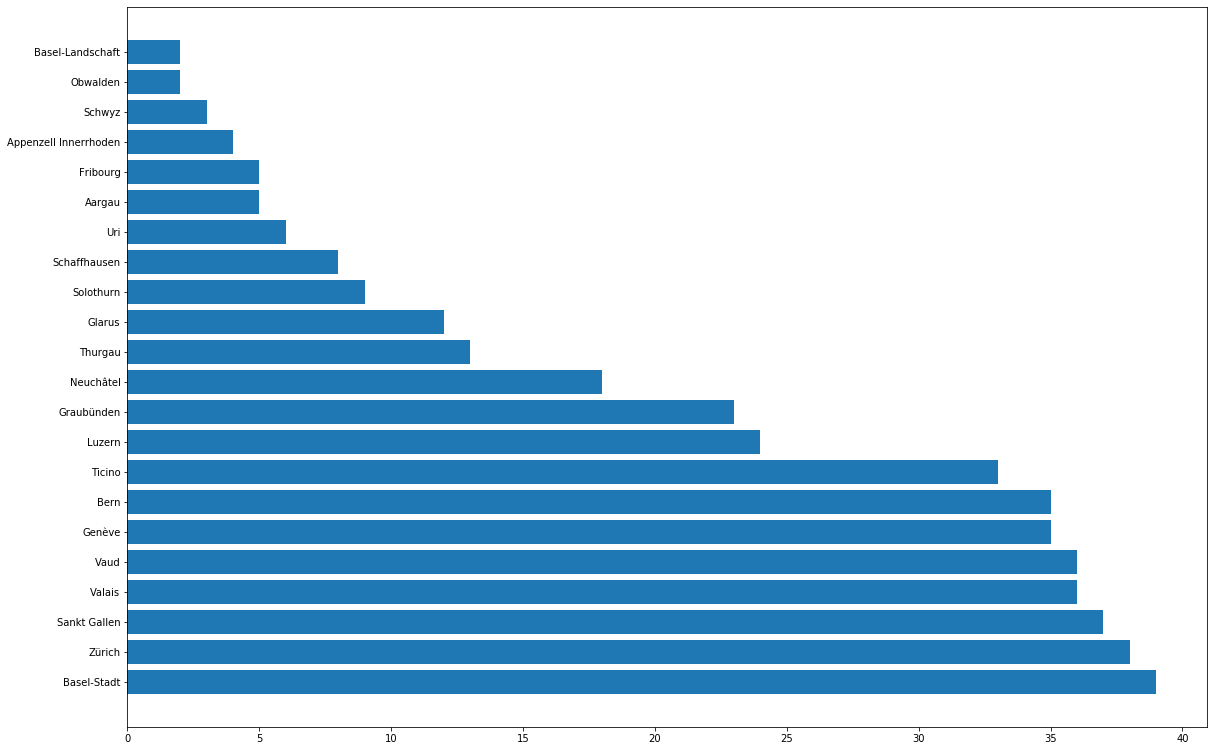

In [37]:
#Faire un petit histogram par admin
import matplotlib.pyplot as plt

df_for_histo = df_for_clustering_final.groupby(['admin_name','Venue']).count().reset_index()
df_for_histo2 = df_for_histo.sort_values(by =['Venue'],ascending=False)
df_for_histo2.head()


fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0,0,1,1])
langs = df_for_histo2['admin_name']
students = df_for_histo2['Venue']
ax.barh(langs,students)
plt.show()


In [47]:
df_for_clustering_final.head()
df_for_clustering_last = df_for_clustering_final.drop('admin_name',1).reset_index(drop=True)
df_for_clustering_last.head()

df_for_clustering_final['bypop'] = df_for_clustering_final['Venue'] / df_for_clustering_final['population_proper']

#ecarter laufenburg quêst ce que cêst que #On va ajuster en rajoutant, venue par population
#cette merde
#ecarter du clustering
df_for_clustering_final.sort_values(by='bypop',ascending=False).head(100)


,Cluster Labels,city,lat_x,lng_x,admin_name,population_proper,Venue,bypop
44,1,Interlaken,46.6881,7.8646,Bern,5592.0,24,0.004292
45,0,Bad Zurzach,47.5872,8.2944,Aargau,4242.0,5,0.001179
17,0,Sion,46.2304,7.3661,Valais,34708.0,36,0.001037
39,0,Davos,46.8091,9.8398,Graubünden,10937.0,11,0.001006
37,0,Glarus,47.0331,9.0664,Glarus,12515.0,12,0.000959
29,0,Martigny,46.1000,7.0728,Valais,17998.0,15,0.000833
34,2,Sierre,46.2918,7.5320,Valais,16860.0,12,0.000712
43,2,Appenzell,47.3333,9.4167,Appenzell Innerrhoden,5649.0,4,0.000708
16,2,Chur,46.8521,9.5297,Graubünden,35038.0,23,0.000656
42,2,Altdorf,46.8806,8.6394,Uri,9401.0,6,0.000638


In [49]:
#df_for_clustering_final.insert(0, 'Cluster Labels', kmeans2.labels_)


In [50]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_for_clustering_last[['Venue','population_proper','lat_x','lng_x']])
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_for_clustering_final[['bypop']])


# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans2.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 3])

In [56]:


df_new = df_for_clustering_last.drop(['Cluster Labels'], axis= 1)

df_for_clustering_last.head()

#df_for_clustering_final.insert(0, 'Cluster Labels', kmeans2.labels_)

df_new.insert(0, 'Cluster Labels', kmeans2.labels_)

df_new.sort_values(by='bypop',ascending=True).head(50)

,Cluster Labels,city,lat_x,lng_x,population_proper,Venue,bypop
18,3,Uster,47.3492,8.7192,34442.0,1,0.000029
22,3,Montreux,46.4333,6.9167,25984.0,1,0.000038
30,3,Muttenz,47.5228,7.6452,17805.0,1,0.000056
32,3,Grenchen,47.1931,7.3958,17140.0,1,0.000058
21,3,Rapperswil-Jona,47.2286,8.8317,26989.0,2,0.000074
38,3,Weinfelden,47.5698,9.1120,11534.0,1,0.000087
0,3,Zürich,47.3786,8.5400,434008.0,38,0.000088
5,3,Winterthur,47.4992,8.7267,109775.0,10,0.000091
9,3,Biel/Bienne,47.1372,7.2472,54456.0,5,0.000092
25,3,Riehen,47.5794,7.6512,21448.0,2,0.000093


In [57]:
import numpy as np

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_for_clustering_last['lat_x'], df_for_clustering_last['lng_x'], df_for_clustering_last['city'], df_for_clustering_last['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
import numpy as np

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_for_clustering_final['lat_x'], df_for_clustering_final['lng_x'], df_for_clustering_final['city'], df_for_clustering_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:
import numpy as np

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_new['lat_x'], df_new['lng_x'], df_new['city'], df_new['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
df_new.head(50).sort_values(by='bypop',ascending = False)

,Cluster Labels,city,lat_x,lng_x,population_proper,Venue,bypop
44,1,Interlaken,46.6881,7.8646,5592.0,24,0.004292
45,0,Bad Zurzach,47.5872,8.2944,4242.0,5,0.001179
17,0,Sion,46.2304,7.3661,34708.0,36,0.001037
39,0,Davos,46.8091,9.8398,10937.0,11,0.001006
37,0,Glarus,47.0331,9.0664,12515.0,12,0.000959
29,0,Martigny,46.1000,7.0728,17998.0,15,0.000833
34,2,Sierre,46.2918,7.5320,16860.0,12,0.000712
43,2,Appenzell,47.3333,9.4167,5649.0,4,0.000708
16,2,Chur,46.8521,9.5297,35038.0,23,0.000656
42,2,Altdorf,46.8806,8.6394,9401.0,6,0.000638


In [1]:
df_new.head(50)

NameError: name 'df_new' is not defined